## Sprocket Central Pty Ltd Company Customers Recommendation  Data analysis

### About the Dataset

**Sprocket Central Pty Ltd**, a medium size bikes & cycling accessories organisation which has a large dataset relating to its customers, but their team is unsure how to effectively analyse it to help optimise its marketing strategy. 

The client provided us with 3 datasets:

* Customer Demographic
* Customer Addresses
* Transactions data in the past 3 months

### Objective of the report

In Phase #1 i have conducted a data cleaning process on each dataset and joined them together.

In Phase #2 i will start data exploration to answer following questions.

* What are the trends in the underlying data?
* Which customer segment has the highest customer value?

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import calendar
import scipy.stats as stats
%matplotlib inline
sns.set_style("whitegrid")

## Setting max displayed rows to 500, in order to display the full output of any command 
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

# suppress warnings 
import warnings
warnings.simplefilter("ignore")

In [2]:
#Importing the joined dataset
CTA=pd.read_csv('CTA_wrangling.csv')

In [3]:
#checking data first rows
CTA.head(2)

,Unnamed: 0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Transaction_year,Transaction_month,Transaction_day,day_of_the_week,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,address,postcode,state,country,property_valuation
0,0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,2017,February,25,Saturday,Kristos,Anthony,Male,19,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,66,984 Hoepker Court,3064,VIC,Australia,6
1,1,11065,1,2950,2017-10-16,False,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,2003-02-07,2017,October,16,Monday,Kristos,Anthony,Male,19,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,66,984 Hoepker Court,3064,VIC,Australia,6


We will drop the unnamed column that since it is not from our dataset

In [4]:
# Dropping unnamed column
CTA.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
# Checking data general information
CTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19327 entries, 0 to 19326
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19327 non-null  int64  
 1   product_id                           19327 non-null  int64  
 2   customer_id                          19327 non-null  int64  
 3   transaction_date                     19327 non-null  object 
 4   online_order                         19327 non-null  bool   
 5   order_status                         19327 non-null  object 
 6   brand                                19327 non-null  object 
 7   product_line                         19327 non-null  object 
 8   product_class                        19327 non-null  object 
 9   product_size                         19327 non-null  object 
 10  list_price                           19327 non-null  float64
 11  standard_cost               

General information states out to some observations:

1. **transaction_id,product_id,customer_id,postcode,Transaction_day,Transaction_year** columns are stated as int where they should be str type
2. **Transaction_date** column are stated as object where they should be datetime type
3. we will construct an **Age group** column to specify the groups that are mostly interested in our product

In [6]:
# ammending column data types
CTA['transaction_id']=CTA['transaction_id'].astype(str)
CTA['product_id']=CTA['product_id'].astype(str)
CTA['customer_id']=CTA['customer_id'].astype(str)
CTA['postcode']=CTA['postcode'].astype(str)
CTA['Transaction_day']=CTA['Transaction_day'].astype(str)
CTA['Transaction_year']=CTA['Transaction_year'].astype(str)
CTA['transaction_date']=pd.to_datetime(CTA['transaction_date'])                          

Constructing an (Age group) column

In [7]:
#checking for minimum date
CTA['Age'].min()

19

In [8]:
#checking for maximum date
CTA['Age'].max()

89

In [9]:
# Divide age group
Age_group = pd.cut(CTA.Age, bins = [18,30,50,70,90], labels= ['18-30','31-50','51-70','71-90'])
CTA.insert(27, 'Age_Group', Age_group)
CTA.head(1)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Transaction_year,Transaction_month,Transaction_day,day_of_the_week,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age_Group,Age,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,2017,February,25,Saturday,Kristos,Anthony,Male,19,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,51-70,66,984 Hoepker Court,3064,VIC,Australia,6


The structure of the dataset:
The data set has 33 columns and 19327 rows. The features cover 3 main areas:

1. Transaction information
2. customer information
3. customer demographics

Our obejctive is to:

1. What are the trends in the underlying data?
2. Which customer segment has the highest customer value?

Features that will help support our investigation:

1. List price
2. Standard cost
3. past_3_years_bike_related_purchases
4. Age
5. Transaction_month
6. day_of_the_week
7. wealth segment
8. state
9. Gender

In [10]:
# numerical Data statistics
CTA.describe()

,list_price,standard_cost,past_3_years_bike_related_purchases,tenure,Age,property_valuation
count,19327.000000,19327.000000,19327.000000,19327.000000,19327.000000,19327.000000
mean,1106.447654,555.749864,48.937135,10.680499,43.517463,7.516014
std,582.891952,405.716005,28.644584,5.672739,12.605646,2.826879
min,12.010000,7.210000,0.000000,1.000000,19.000000,1.000000
25%,575.270000,215.140000,24.000000,6.000000,34.000000,6.000000
50%,1163.890000,507.580000,48.000000,11.000000,43.000000,8.000000
75%,1635.300000,795.100000,73.000000,15.000000,53.000000,10.000000
max,2091.470000,1759.850000,99.000000,22.000000,89.000000,12.000000


### Univariate Exploration

In this section, we will investigate distributions of individual variables. If we see unusual points or outliers, we will take a deeper look to clean things up and prepare ourself to look at relationships between variables.

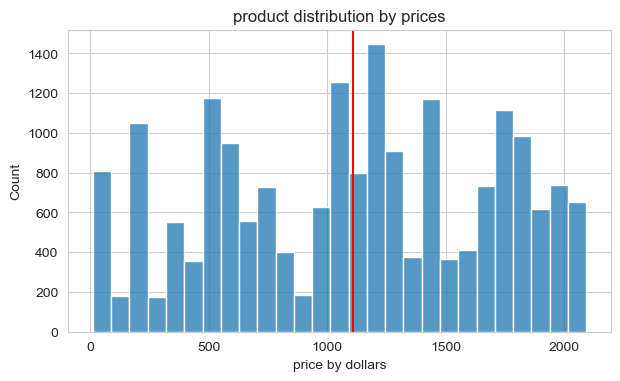

In [11]:
# product distribution by prices
plt.figure(figsize=(7,4),dpi=100)
sns.histplot(data=CTA,x='list_price');
plt.axvline(x=CTA['list_price'].mean(), color = "red");
plt.title("product distribution by prices")
plt.xlabel('price by dollars')
plt.ylabel('Count')
plt.show()

In [12]:
#Calculating list prices mean
CTA['list_price'].mean()

1106.4476540591152

**Graph Conclusion:** we notice that we have a normally distributed data with no outliers the average of the prices is 1106

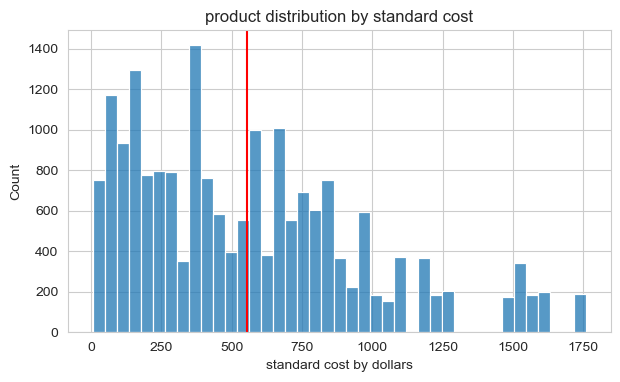

In [13]:
# product distribution by standard cost
plt.figure(figsize=(7,4),dpi=100)
sns.histplot(data=CTA,x='standard_cost');
plt.axvline(x=CTA['standard_cost'].mean(), color = "red");
plt.title("product distribution by standard cost")
plt.xlabel('standard cost by dollars')
plt.ylabel('Count')
plt.show()

In [14]:
#Calculating standard cost mean
CTA['standard_cost'].mean()

555.7498644383589

**Graph Conclusion:** We notice that we have a positively skewed (right-skewed) data with some outliers, the average of the cost in dollars is 555

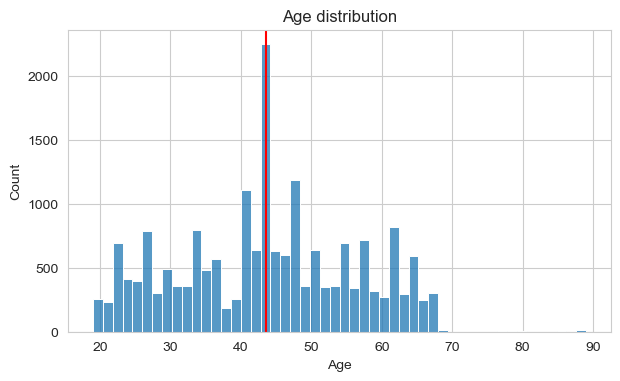

In [15]:
# Age distribution
plt.figure(figsize=(7,4),dpi=100)
sns.histplot(data=CTA,x='Age');
plt.axvline(x=CTA['Age'].mean(), color = "red");
plt.title("Age distribution")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [16]:
#Calculating Age mean
CTA['Age'].mean()

43.51746261706421

**Graph Conclusion:** We have a normaly distributed data with few outliers at ages 80 and 90 ,ages in the data are mostly distributed between 20s and 60s the visual indicates that most of our customer ages range from 30s to mid 40s which is the peak of their youth, the average Age is 43

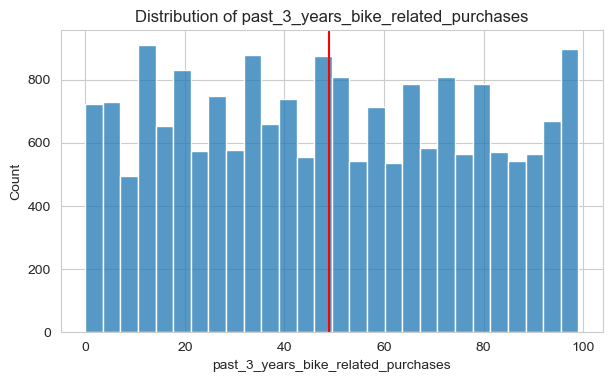

In [17]:
# Distribution of past_3_years_bike_related_purchases
plt.figure(figsize=(7,4),dpi=100)
sns.histplot(data=CTA,x='past_3_years_bike_related_purchases');
plt.axvline(x=CTA['past_3_years_bike_related_purchases'].mean(), color = "red");
plt.title("Distribution of past_3_years_bike_related_purchases")
plt.xlabel('past_3_years_bike_related_purchases')
plt.ylabel('Count')
plt.show()

In [18]:
#Calculating past_3_years_bike_related_purchases mean
CTA['past_3_years_bike_related_purchases'].mean()

48.937134578568845

**Graph Conclusion:** We have a normally distributed data with no outliers,the mean of the purchases in the past three years is 48

31-50    52.217106
51-70    29.119884
18-30    18.507787
71-90     0.155223
Name: Age_Group, dtype: float64


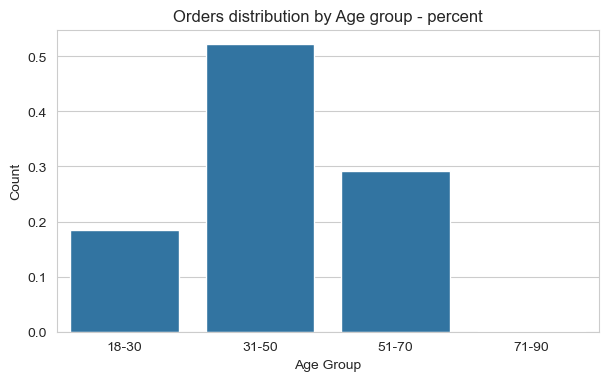

In [19]:
#Orders distribution by Age groups
plt.figure(figsize = (7,4), dpi = 100)
base_color = sns.color_palette()[0]

counts = CTA['Age_Group'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('Age Group')
plt.ylabel('Count')
print(counts * 100)

plt.title("Orders distribution by Age group - percent")
plt.show()

**Graph Conclusion:** Orders count among different groups state that people from Age 31-50 orders the most from us with 52% of total orders

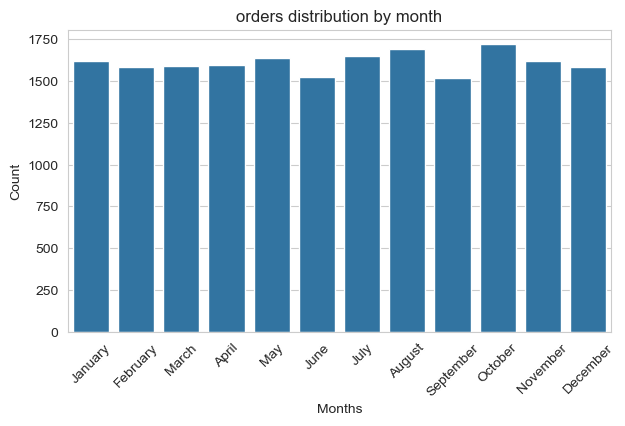

In [20]:
#Orders distribution by month
plt.figure(figsize=(7,4),dpi=100)

weekday = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August','September','October','November','December']
weekday_categ = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
CTA['Transaction_month'] = CTA['Transaction_month'].astype(weekday_categ)

sns.countplot(CTA['Transaction_month'],color=base_color)
plt.title("orders distribution by month")
plt.xlabel('Months')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Graph Conclusion**: The amount of purchases along the year are almost the same but the highest time in the year is in the start and end of the summer in months July,August & October

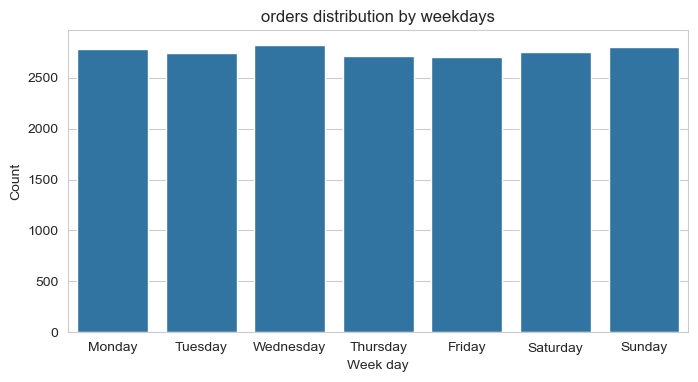

In [21]:
#Orders distribution by weekdays
plt.figure(figsize = (8,4), dpi = 100)

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_categ = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
CTA['day_of_the_week'] = CTA['day_of_the_week'].astype(weekday_categ)

sns.countplot(CTA['day_of_the_week'],color=base_color)
plt.xlabel('Week day')
plt.ylabel('Count')
plt.title("orders distribution by weekdays")

plt.show()

**Graph Conclusion**: althought the amount of bikes sold along the week is almost the same but we can identify a increaseof amount on wednesday 

Mass Customer        50.095721
High Net Worth       25.482486
Affluent Customer    24.421793
Name: wealth_segment, dtype: float64


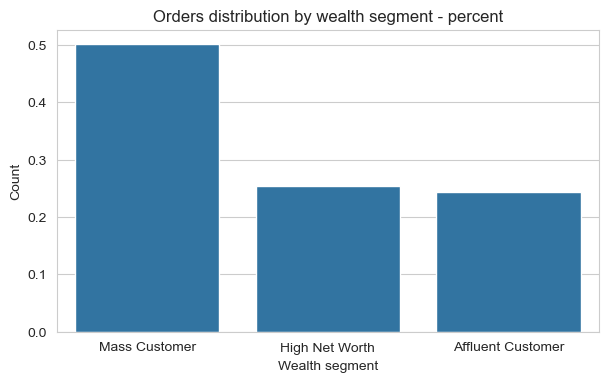

In [22]:
#Orders distribution by wealth segment
plt.figure(figsize = (7,4), dpi = 100)

counts = CTA['wealth_segment'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('Wealth segment')
plt.ylabel('Count')
print(counts * 100)

plt.title("Orders distribution by wealth segment - percent")
plt.show()

**Graph conclusion**:Customers are segmented into three parts according to their financial position, 
first is the Average income customers(Mass customers) which represents 50% of the orders,second we have more than average income(Affluent customers) which represents 24% of the orders ,third we have high income customers(High net worth customers) which represents 25% of the orders

NSW                50.990842
VIC                22.776427
QLD                21.394940
New South Wales     2.442179
Victoria            2.395612
Name: state, dtype: float64


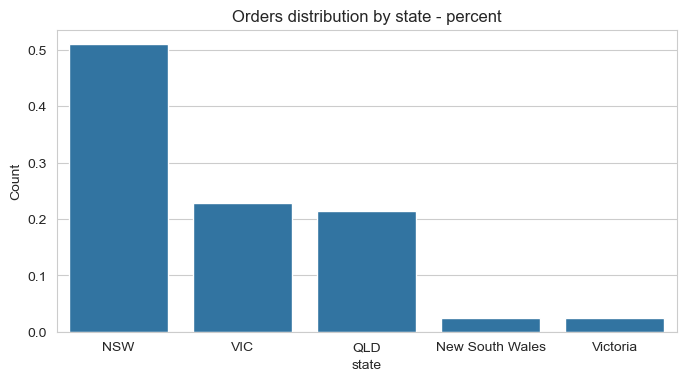

In [23]:
#Orders distribution by state
plt.figure(figsize = (8,4), dpi = 100)
counts = CTA['state'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('state')
plt.ylabel('Count')
print(counts * 100)

plt.title("Orders distribution by state - percent")
plt.show()

**Graph conclusion**:Most of our orders are done in NSW state in Ausrtalia since it has 50% of our orders

Female    51.26507
Male      48.73493
Name: gender, dtype: float64


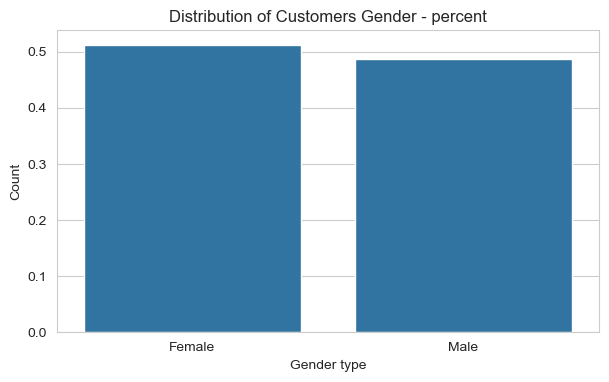

In [24]:
#Orders distribution by Gender

plt.figure(figsize = (7,4), dpi = 100)

counts = CTA['gender'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('Gender type')
plt.ylabel('Count')
print(counts * 100)

plt.title("Distribution of Customers Gender - percent")
plt.show()

**Graph conclusion**:Distribution of orders between men and women are almost the same , 51% of our orders are from women and 49% are from men

Manufacturing         37.015574
Financial Services    19.651265
Health                15.770683
Retail                 9.033994
Property               6.612511
Entertainment          3.590831
IT                     3.575309
Argiculture            2.928546
Telecommunications     1.821286
Name: job_industry_category, dtype: float64


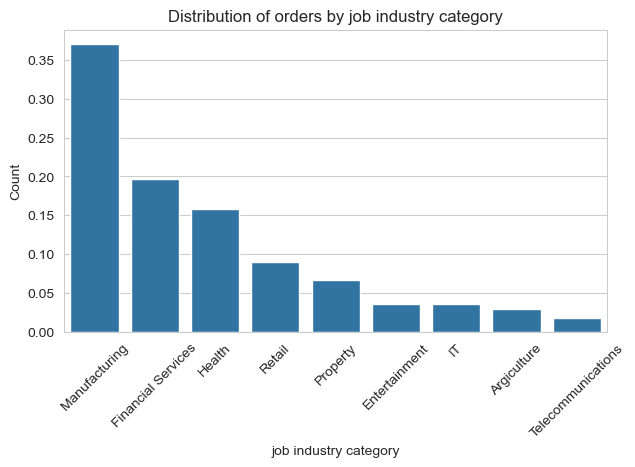

In [25]:
# job_industry_category
plt.figure(figsize = (7,4), dpi = 100)

counts = CTA['job_industry_category'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('job industry category')
plt.ylabel('Count')
plt.xticks(rotation=45)
print(counts * 100)

plt.title("Distribution of orders by job industry category")
plt.show()

**Graphic conclusion:** The visual indicates that most of our customers work at manufacturing industry 

In [26]:
#Removing outliers for Age column

CTA = CTA[CTA["Age"] <= 80]
CTA=CTA[CTA['standard_cost']<=1750]

The distribution(s) of variable(s) of interest:

1. From the distribution of prices we notice that we have a normally distributed data with no outliers the average of the prices is 1106.
2. For Standard cost We have a positively skewed (right-skewed) distribution with some outliers, the average of the cost in dollars is 555.
3. Ages in the data are mostly distributed between 20s and 60s, the most demanding age of our customers range from 30 to mid 40s which makes sense since they are in the peak of their youth and trying to mantain their health and excercise more, the average age is 43.
4. purchases related to bikes is the purchases made by our customer in the past three years related to bikes , we have a normally distributed data with no outliers,the mean of the purchases in the past three years is 48.
5. The amount of orders along the year is almost the same but the highest time in the year is in the start and end of the summer in months July,August & October the reason for that could be that people are buying bikes to spend the summer vacation with.
6.  althought the amount of bikes sold along the week is almost the same but we can identify a increase of amount on wednesday.
7. (Mass customers) represents 50% of the orders,(Affluent customers) represents 24% of the orders,(High net worth customers) represents 25% of the orders.
8. Most of our orders are done in NSW state in Ausrtalia since it has 50% of our orders.
9. Distribution of orders between men and women are almost the same , 51% of our orders are from women and 49% are from men.
10. Most of our customers work at manufacturing industry.


Unusual distributions:

1. The Age had some outliers that we removed.
2. Standard cost had some outliers that we removed.

### Bivariate Exploration

In this section, we will investigate relationships between pairs of variables in our data

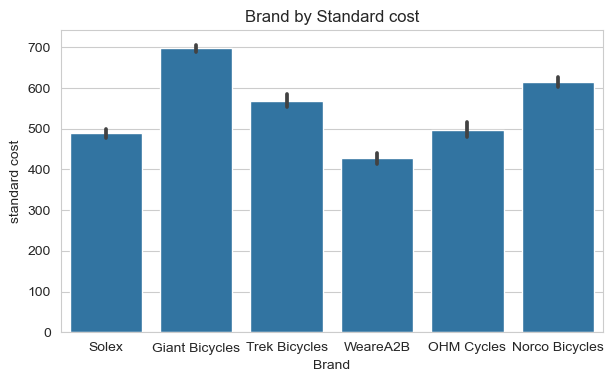

In [27]:
# Brand VS cost

plt.figure(figsize = (7,4), dpi = 100)

sns.barplot(data = CTA, x = "brand",y='standard_cost',color=base_color)
plt.xlabel('Brand');
plt.ylabel('standard cost')

plt.title("Brand by Standard cost")

plt.show()

**Graph conclusion:**The most costing product is Giant bicycles

In [ ]:
#Gender vs owns a car

plt.figure(figsize = (7,4), dpi = 100)

sns.countplot(data = CTA, x = "owns_car",hue='gender')
plt.xlabel('owns a car');
plt.ylabel('count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Gender vs owns a car")

plt.show()

**Graph conclusion:** We conclude from the visual that Women who owns a car buys more than women who don't and Men who do not own a car buy more than Men who do

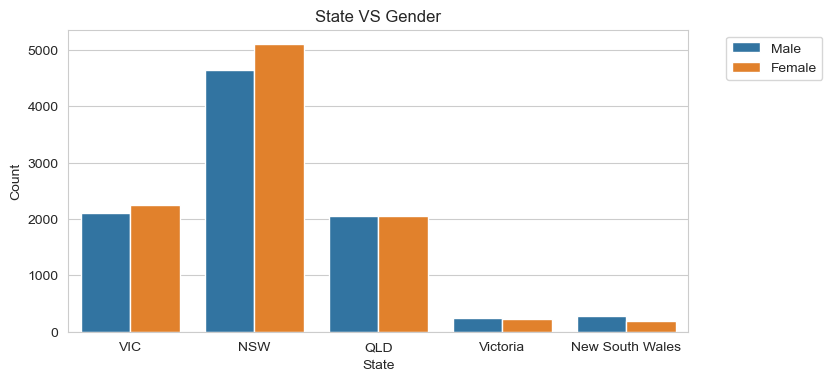

In [28]:
#State vs Gender

plt.figure(figsize = (8,4), dpi = 100)

sns.countplot(data = CTA, x = "state",hue='gender')
plt.xlabel('State');
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("State VS Gender")

plt.show()

**Graphic conclusion:** In most of the states women buy more than men but in Victoria and new south wales men buy more

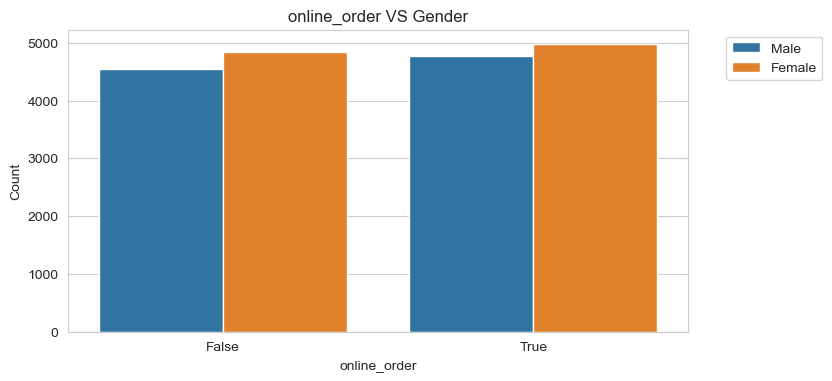

In [29]:
#online_order vs Gender

plt.figure(figsize = (8,4), dpi = 100)

sns.countplot(data = CTA, x = "online_order",hue='gender')
plt.xlabel('online_order');
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("online_order VS Gender")

plt.show()

**Graphic Conclusions:** visual states that women order online more than men

Some of the relationships observed in this part of the investigation:

1. Women who owns a car buy more bikes than women who don't and Men who do not own a car buy more than Men who do.
2. In most of the states women buy more than men but in Victoria and new south wales men buy more.
3. women order bikes online more than men.
4. Most profitable product from our products is WeareA2B brand

### Multivariate Explortion

Exploring Multiple variable at once

In [30]:
wealth_segment_revenue=CTA.groupby(['wealth_segment','gender'],as_index=False)['list_price'].sum()
wealth_segment_revenue

,wealth_segment,gender,list_price
0,Affluent Customer,Female,2565496.49
1,Affluent Customer,Male,2577954.24
2,High Net Worth,Female,2694103.96
3,High Net Worth,Male,2637203.20
4,Mass Customer,Female,5473807.25
5,Mass Customer,Male,5048084.28


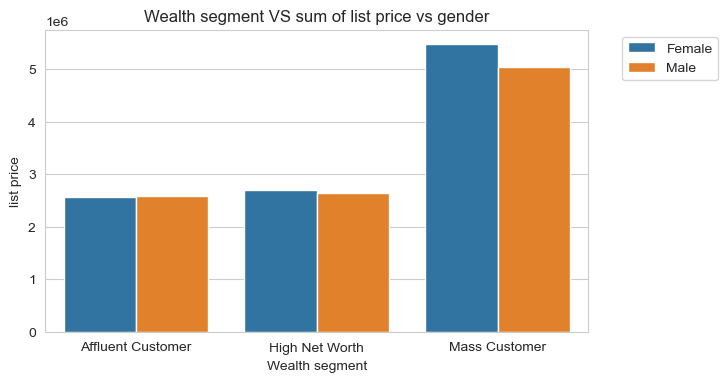

In [31]:
#Wealth segment vs list price per gender
plt.figure(figsize = (7,4), dpi = 100);

sns.barplot(data=wealth_segment_revenue,x='wealth_segment',y='list_price',hue='gender');
plt.xlabel('Wealth segment');
plt.ylabel('list price');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.title("Wealth segment VS sum of list price vs gender");

**Graphic conclusion:**Most of the revenue has been produced by mass customers by males

In [32]:
job_industry_category_revenue=CTA.groupby(['job_industry_category','gender'],as_index=False)['list_price'].sum()
job_industry_category_revenue.head(5)

,job_industry_category,gender,list_price
0,Argiculture,Female,333753.58
1,Argiculture,Male,260924.62
2,Entertainment,Female,350103.01
3,Entertainment,Male,407437.64
4,Financial Services,Female,2065502.29


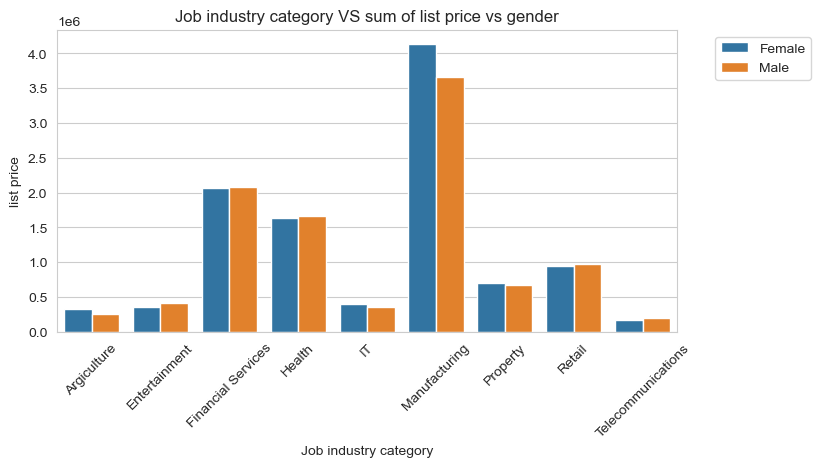

In [33]:
#job_industry_category vs list price vs gender
plt.figure(figsize = (8,4), dpi = 100);

sns.barplot(data=job_industry_category_revenue,x='job_industry_category',y='list_price',hue='gender');
plt.xlabel('Job industry category');
plt.ylabel('list price');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.title("Job industry category VS sum of list price vs gender");
plt.xticks(rotation=45);

**Graphic conclusion:** Manufacturing industry produced more revenue than other industries by male customers.

No handles with labels found to put in legend.


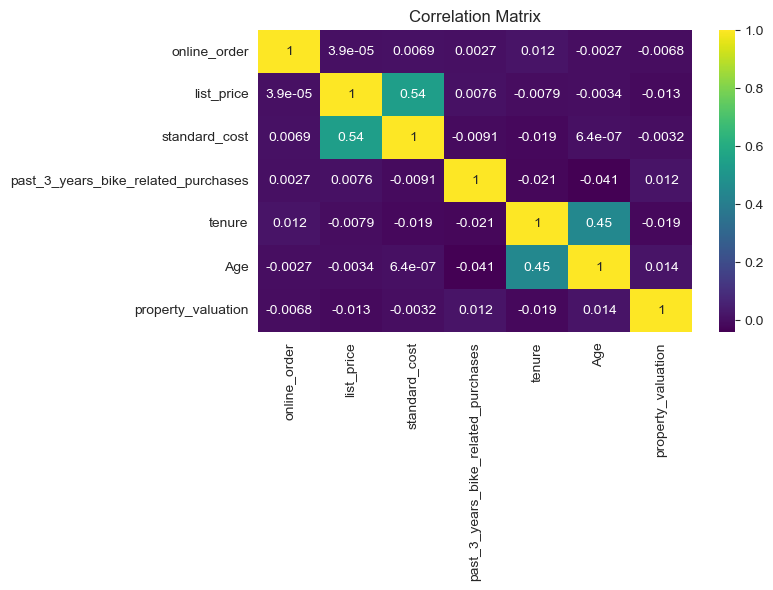

In [34]:
#correlation matrix
plt.figure(figsize = (7,4), dpi = 100);

sns.heatmap(CTA.corr(), cmap = "viridis", annot = True);
plt.title("Correlation Matrix");
plt.xticks(rotation = 90);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

plt.show();

**Graphic conclusion:** Visual states that there are no strong correlations among data 

Some of the relationships observed in this part of the investigation:

1. Most of the revenue has been produced by mass customers by males.
2. Manufacturing industry produced more revenue than other industries by male customers.
3. There are no strong correlations among numerical data.

### RFM Anlaysis

Now let's start doing a RFM analysis which is segmenting customers throught thier Recency(Recent purchases),Frequency(How many purchases have they done) & Monetary (How much revenue have they given the company)

In [35]:
# This is a quick code to calculate Recency , frequency , monetary for each customer
end_date = max(CTA['transaction_date']) + dt.timedelta(days=1)

CTA_rfm = CTA.groupby('customer_id').agg(
    recency=('transaction_date', lambda x: (end_date - x.max()).days),
    frequency=('transaction_id', 'count'),
    monetary=('list_price', 'sum')
).reset_index()

CTA_rfm.head()

,customer_id,recency,frequency,monetary
0,1,8,11,9084.45
1,100,12,2,2748.20
2,1000,1,9,10183.70
3,1001,43,7,6233.51
4,1002,156,4,5038.32


In [36]:
#statitics of the RFM
CTA_rfm.describe()

,recency,frequency,monetary
count,3408.000000,3408.000000,3408.000000
mean,62.970070,5.611796,6160.988680
std,58.796917,2.289664,2890.593579
min,1.000000,1.000000,60.340000
25%,19.000000,4.000000,4071.360000
50%,45.000000,5.000000,5886.030000
75%,87.000000,7.000000,7969.040000
max,360.000000,14.000000,19071.320000


In [37]:
# splitting customer into segments using quantiles
quantiles=CTA_rfm.quantile(q=[0.25,0.5,0.75])

In [38]:
# checking segments
quantiles.to_dict()

{'recency': {0.25: 19.0, 0.5: 45.0, 0.75: 87.0},
 'frequency': {0.25: 4.0, 0.5: 5.0, 0.75: 7.0},
 'monetary': {0.25: 4071.36, 0.5: 5886.030000000001, 0.75: 7969.04}}

In [39]:
# we will segment data into four groups using quantiles 

## for Recency 

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Frequency and Monetary value 

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1  

In [40]:
# apply the function to each rfm column to create segment for each customer in each r,f,m column
CTA_rfm['R'] = CTA_rfm['recency'].apply(RClass, args=('recency',quantiles))
CTA_rfm['F'] = CTA_rfm['frequency'].apply(FMClass, args=('frequency',quantiles))
CTA_rfm['M'] = CTA_rfm['monetary'].apply(FMClass, args=('monetary',quantiles))

In [41]:
#calculating RFM class by concatenating the score of each r,f,m & calculating the RFM score by summing the r,f,m segments
CTA_rfm['RFMClass'] = CTA_rfm['R'].map(str) + CTA_rfm['F'].map(str) + CTA_rfm['M'].map(str)
CTA_rfm['RFMscore']= CTA_rfm[['R','F','M']].sum(axis=1)

In [42]:
#checking results
CTA_rfm.head()

,customer_id,recency,frequency,monetary,R,F,M,RFMClass,RFMscore
0,1,8,11,9084.45,1,1,1,111,3
1,100,12,2,2748.20,1,4,4,144,9
2,1000,1,9,10183.70,1,1,1,111,3
3,1001,43,7,6233.51,2,2,2,222,6
4,1002,156,4,5038.32,4,4,3,443,11


<Figure size 800x400 with 0 Axes>

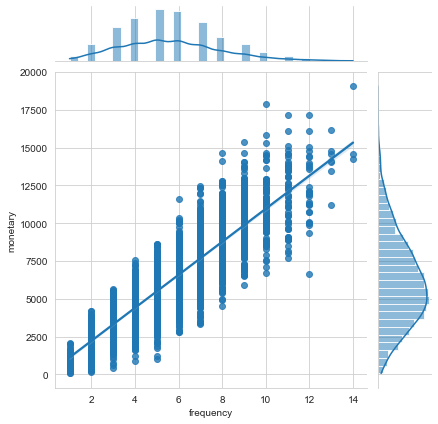

In [43]:
#checking for relation between Frequency and Monetary
plt.figure(figsize=(8,4),dpi=100);
sns.jointplot(x='frequency',y='monetary',data=CTA_rfm,kind='reg');

**Graphic conclusion:** Visual shows a strong +ve relationship between Frequency and Monetary

<Figure size 800x400 with 0 Axes>

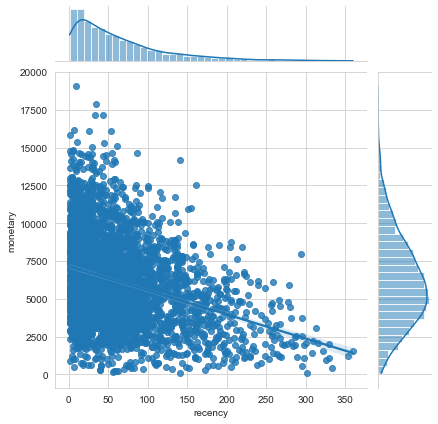

In [44]:
#checking for relation between Recency and Monetary
plt.figure(figsize=(8,4),dpi=100);
sns.jointplot(x='recency',y='monetary',data=CTA_rfm,kind='reg');

**Graphic conclusion:** Visual shows a strong -ve relationship between Recency and Monetary

Assign a royality level to each customer

In [45]:
# Assigning Loyality level to each customer using qcut method which segments data as per number of quantiles decided
Loyality_level=['Platinum','Gold','Silver','Bronze']
score_cuts=pd.qcut(CTA_rfm['RFMscore'],q=4,labels=Loyality_level)
CTA_rfm['RFM_loyalty_level']=score_cuts.values
CTA_rfm.head()

,customer_id,recency,frequency,monetary,R,F,M,RFMClass,RFMscore,RFM_loyalty_level
0,1,8,11,9084.45,1,1,1,111,3,Platinum
1,100,12,2,2748.20,1,4,4,144,9,Silver
2,1000,1,9,10183.70,1,1,1,111,3,Platinum
3,1001,43,7,6233.51,2,2,2,222,6,Gold
4,1002,156,4,5038.32,4,4,3,443,11,Bronze


Joinning CTA_rfmdataset to original CTA dataset

In [46]:
# joinning dataset
CTA_rfm_allinfo=CTA.merge(CTA_rfm,on='customer_id',how='inner')

In [47]:
#checking the final result
CTA_rfm_allinfo.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Transaction_year,Transaction_month,Transaction_day,day_of_the_week,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age_Group,Age,address,postcode,state,country,property_valuation,recency,frequency,monetary,R,F,M,RFMClass,RFMscore,RFM_loyalty_level
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,2017,February,25,Saturday,Kristos,Anthony,Male,19,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,51-70,66,984 Hoepker Court,3064,VIC,Australia,6,76,3,1953.15,3,4,4,344,11,Bronze
1,11065,1,2950,2017-10-16,False,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,2003-02-07,2017,October,16,Monday,Kristos,Anthony,Male,19,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,51-70,66,984 Hoepker Court,3064,VIC,Australia,6,76,3,1953.15,3,4,4,344,11,Bronze
2,18923,62,2950,2017-04-26,False,Approved,Solex,Standard,medium,medium,478.16,298.72,2010-11-05,2017,April,26,Wednesday,Kristos,Anthony,Male,19,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,51-70,66,984 Hoepker Court,3064,VIC,Australia,6,76,3,1953.15,3,4,4,344,11,Bronze
3,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,2017,May,21,Sunday,Lauree,O'Donnell,Female,89,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,31-50,42,4 Shopko Circle,2196,NSW,Australia,5,21,7,7351.70,2,2,2,222,6,Gold
4,6862,4,3120,2017-10-05,False,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,2011-04-16,2017,October,5,Thursday,Lauree,O'Donnell,Female,89,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,31-50,42,4 Shopko Circle,2196,NSW,Australia,5,21,7,7351.70,2,2,2,222,6,Gold


Finally we have segmented customer into 4 different segments and we should prioritize our marketing strategy as per each segment,now we will shift to phase 3 from our project which is Machine learning modeling.

In [48]:
# Exporting our CTA dataframe to use it in phase 3 from our project
CTA_rfm_allinfo.to_csv('CTA_rfm_allinfo.csv')